
## Comentarios

### Regresión Polinomial y Validación Cruzada (10pts)

ok, solo no entiendo porque usan    

```
col =poly.get_feature_names_out().tolist()
X_pol = pd.DataFrame(X_pol, columns=col)
X_pol = X_pol.drop(['1'], axis=1)
```

### ***puntos 9/10***

### Regularización

ok, igual  que el anterior no entiendo el porque usar o modificar x_pol

### ***puntos 9/10***


### bootstrap
ok
### ***puntos 9/10***






# Parte 2 validación y bootstraping

Para este segundo punto, utilizaremos un conjunto de datos aleatorios que contienen una variable predictora y una variable objetivo, la finalidad de este ejercicio será utilizar técnicas de validación cruzada y bootstraping debido a la poca cantidad de datos para asi poder crear un modelo de regresión lineal robusto que permita predecir la variable objetivo.

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
import seaborn as sns

In [ ]:
X_train = np.load('part2xTrain.npy')
X_val = np.load('part2xVal.npy')
y_train = np.load('part2yTrain.npy')
y_val = np.load('part24yVal.npy')

<AxesSubplot: >

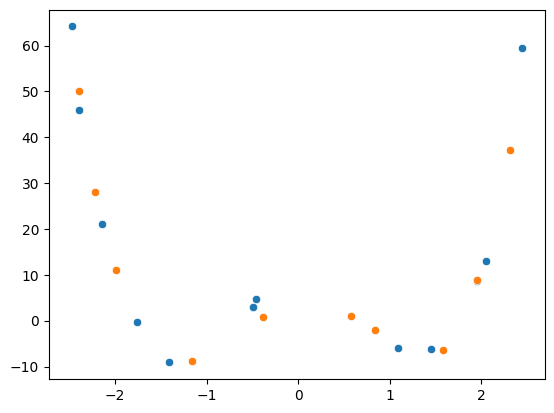

In [ ]:
sns.scatterplot(x = X_train, y= y_train)
sns.scatterplot(x = X_val, y= y_val)

Por la forma de los datos, podemos ver que se dividen en 2 parábolas, una antes del 0 y otra después del 0, por lo cual creemos que un modelo de regresión de grado 4 puede llegar a ajustar adecuadamente los datos

# Regresión Polinomial y Validación Cruzada

En primera instancia probaremos con regresiones polinomiales de varios grados con cross validation teniendo 5 folds, de la misma forma que en la parte 1 del parcial.

In [ ]:
X = np.append(X_train, X_val)
y = np.append(y_train, y_val)
for i in range(1,8):
    poly = PolynomialFeatures(i)
    X_pol = poly.fit_transform(X.reshape(-1,1))
    col =poly.get_feature_names_out().tolist()
    X_pol = pd.DataFrame(X_pol, columns=col)
    X_pol = X_pol.drop(['1'], axis=1)
    lm = LinearRegression()
    mse_score = cross_val_score(lm, X_pol, y, cv=5, scoring = 'neg_mean_squared_error')
    mae_score = cross_val_score(lm, X_pol, y, cv=5, scoring = 'neg_mean_absolute_error')
    print(f'Para un modelo de grado {i} se obtiene un MSE promedio de: {np.mean(mse_score)} y una varianza de: {np.var(mse_score)}')
    print(f'Para un modelo de grado {i} se obtiene un MAE promedio de: {np.mean(mae_score)} y una varianza de: {np.var(mae_score)}')


Para un modelo de grado 1 se obtiene un MSE promedio de: -507.82336129819885 y una varianza de: 114253.15714640965
Para un modelo de grado 1 se obtiene un MAE promedio de: -18.12075888294648 y una varianza de: 23.93159980777404
Para un modelo de grado 2 se obtiene un MSE promedio de: -173.14811999193745 y una varianza de: 12300.455377143464
Para un modelo de grado 2 se obtiene un MAE promedio de: -11.55743825207737 y una varianza de: 10.46307067206731
Para un modelo de grado 3 se obtiene un MSE promedio de: -181.17330870224094 y una varianza de: 14861.621024635644
Para un modelo de grado 3 se obtiene un MAE promedio de: -11.69954821413079 y una varianza de: 10.880728179209076
Para un modelo de grado 4 se obtiene un MSE promedio de: -4.836738092704868 y una varianza de: 4.811836332291781
Para un modelo de grado 4 se obtiene un MAE promedio de: -1.8371628735007282 y una varianza de: 0.19293992703086676
Para un modelo de grado 5 se obtiene un MSE promedio de: -4.906514381203858 y una vari

En este caso, podemos ver que el grado del polinomio que minimiza el MSE y el MAE es el de grado 4, seguido de cerca por el de grado 5, aunque este último tiene una menor varianza, por lo que la elección del modelo está entre el de grado 4 y el de grado 5.

# 2.B Mejora del Modelo con Regularización

Para este paso consideraremos únicamente modelos hasta grado 5, puesto que con los de grado 6 y 7 vuelve a haber un incremento en el MSE y realizaremos una búsqueda de grilla con cross validation variando los alphas de penalización entre 0 y 1, esto lo realizaremos con la función "GridSearchCV" que al igual que la función "cross_val_score" toma el tipo de modelo que se va a ajustar, una serie de alphas para realizar la búsqueda, la cantidad de folds que se usarán, que en este caso serán 5, las métricas a evaluar que serán MSE y MAE y según qué métrica se ajustará el modelo que se usará posteriormente, que en este caso será el MSE.

Probaremos primero aplicando regularización con una regresión Ridge y posteriormente haremos lo mismo con una Lasso y elegiremos el mejor modelo.


In [ ]:
X = np.append(X_train, X_val)
y = np.append(y_train, y_val)
alfas = {'alpha': np.linspace(0,10, 100)}
# alfas = {'alpha': np.logspace(0,10, 100)}

GS_R_DF = pd.DataFrame()
for i in range(1,6):
    poly = PolynomialFeatures(i)
    X_pol = poly.fit_transform(X.reshape(-1,1))
    col =poly.get_feature_names_out().tolist()
    X_pol = pd.DataFrame(X_pol, columns=col)
    X_pol = X_pol.drop(['1'], axis=1)
    lm_R = Ridge()
    GS_R = GridSearchCV(lm_R, alfas, cv=5, scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error'], refit='neg_mean_squared_error')
    GS_R.fit(X_pol, y)
    deg_res =  pd.DataFrame.from_dict(GS_R.cv_results_)
    deg_res['degree'] = [i for j in range(len(deg_res))]
    GS_R_DF = pd.concat([GS_R_DF, deg_res])
    besto_index = GS_R.best_index_
    print(f"Para un modelo de grado {i} el mejor alfa es {deg_res['param_alpha'][besto_index]} con un mse promedio de: {deg_res['mean_test_neg_mean_squared_error'][besto_index]} y un error estandar: {deg_res['std_test_neg_mean_squared_error'][besto_index]} y con un MAE promedio de: {deg_res['mean_test_neg_mean_absolute_error'][besto_index]} y un error estandar: {deg_res['std_test_neg_mean_absolute_error'][besto_index]}")
    #print(f'Para un modelo de grado {i} se obtiene un mae promedio de: {np.mean(mae_score)} y una varianza de: {np.var(mae_score)}')
GS_R_DF = GS_R_DF[['param_alpha', 'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'std_test_neg_mean_absolute_error', 'degree']]
GS_R_DF.sort_values('mean_test_neg_mean_squared_error', ascending=False, inplace=True)
GS_R_DF.head(5)

Para un modelo de grado 1 el mejor alfa es 10.0 con un mse promedio de: -506.71731583358195 y un error estandar: 332.23002804317747 y con un MAE promedio de: -18.157609390060536 y un error estandar: 4.886449541560533
Para un modelo de grado 2 el mejor alfa es 0.0 con un mse promedio de: -173.14811999193748 y un error estandar: 110.90741804380559 y con un MAE promedio de: -11.557438252077372 y un error estandar: 3.234667011002417
Para un modelo de grado 3 el mejor alfa es 0.0 con un mse promedio de: -181.17330870224097 y un error estandar: 121.90824838638153 y con un MAE promedio de: -11.699548214130788 y un error estandar: 3.2985948795220534
Para un modelo de grado 4 el mejor alfa es 0.0 con un mse promedio de: -4.836738092704781 y un error estandar: 2.1935898277234482 y con un MAE promedio de: -1.8371628735007057 y un error estandar: 0.4392492766423845
Para un modelo de grado 5 el mejor alfa es 0.0 con un mse promedio de: -4.906514381203578 y un error estandar: 2.1339511685557238 y co

,param_alpha,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,degree
0,0.0,-4.836738,2.193590,-1.837163,0.439249,4
0,0.0,-4.906514,2.133951,-1.862251,0.403367,5
1,0.10101,-4.949740,2.571534,-1.832814,0.512130,4
1,0.10101,-4.999215,2.539835,-1.854248,0.487909,5
2,0.20202,-5.125926,3.010234,-1.846972,0.562022,4


Para Ridge, vemos que la decisión que toma es para el grado 1 aumentar al máximo la regularización, sin embargo, para el resto de grados decide que lo mejor es no aplicar regularización, dando que el mejor modelo en este caso será uno de grado 4 sin regularizar.

In [ ]:
X = np.append(X_train, X_val)
y = np.append(y_train, y_val)
alfas = {'alpha': np.linspace(0.01,2, 100)}
# alfas = {'alpha': np.logspace(0,10, 100)}

GS_L_DF = pd.DataFrame()
for i in range(1,6):
    poly = PolynomialFeatures(i)
    X_pol = poly.fit_transform(X.reshape(-1,1))
    col =poly.get_feature_names_out().tolist()
    X_pol = pd.DataFrame(X_pol, columns=col)
    X_pol = X_pol.drop(['1'], axis=1)
    lm_R = Lasso()
    GS_L = GridSearchCV(lm_R, alfas, cv=5, scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error'], refit='neg_mean_squared_error')
    GS_L.fit(X_pol, y)
    deg_res =  pd.DataFrame.from_dict(GS_L.cv_results_)
    deg_res['degree'] = [i for j in range(len(deg_res))]
    GS_L_DF = pd.concat([GS_L_DF, deg_res])
    besto_index = GS_L.best_index_
    print(f"Para un modelo de grado {i} el mejor alfa es {deg_res['param_alpha'][besto_index]} con un mse promedio de: {deg_res['mean_test_neg_mean_squared_error'][besto_index]} y un error estandar: {deg_res['std_test_neg_mean_squared_error'][besto_index]} y con un MAE promedio de: {deg_res['mean_test_neg_mean_absolute_error'][besto_index]} y un error estandar: {deg_res['std_test_neg_mean_absolute_error'][besto_index]}")
    #print(f'Para un modelo de grado {i} se obtiene un mae promedio de: {np.mean(mae_score)} y una varianza de: {np.var(mae_score)}')
GS_L_DF = GS_L_DF[['param_alpha', 'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'std_test_neg_mean_absolute_error', 'degree']]
GS_L_DF.sort_values('mean_test_neg_mean_squared_error', ascending=False, inplace=True)
GS_L_DF.head(5)

Para un modelo de grado 1 el mejor alfa es 0.01 con un mse promedio de: -507.83090871943375 y un error estandar: 337.9732972433613 y con un MAE promedio de: -18.121396208643368 y un error estandar: 4.891797054384078
Para un modelo de grado 2 el mejor alfa es 0.01 con un mse promedio de: -173.16764946608066 y un error estandar: 110.92007574103442 y con un MAE promedio de: -11.55767293814128 y un error estandar: 3.233928532382459
Para un modelo de grado 3 el mejor alfa es 0.3115151515151515 con un mse promedio de: -179.04108376195913 y un error estandar: 123.08847305618497 y con un MAE promedio de: -11.628652330446357 y un error estandar: 3.3459814135380035
Para un modelo de grado 4 el mejor alfa es 0.050202020202020206 con un mse promedio de: -4.754071593586988 y un error estandar: 2.352152217232143 y con un MAE promedio de: -1.8063926540074653 y un error estandar: 0.4642634609093753
Para un modelo de grado 5 el mejor alfa es 0.0301010101010101 con un mse promedio de: -4.840175122915155

,param_alpha,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,degree
2,0.050202,-4.754072,2.352152,-1.806393,0.464263,4
3,0.070303,-4.765149,2.420087,-1.807734,0.462950,4
1,0.030101,-4.782818,2.283410,-1.818535,0.455973,4
4,0.090404,-4.786963,2.493393,-1.810093,0.460937,4
5,0.110505,-4.809454,2.583157,-1.808523,0.462957,4


Aqui podemos observar que en los casos de menor orden, la búsqueda de parámetros con Lasso arroja que resulta mejor no aplicar este tipo de regularización, eligiendo los valores de alpha que se encuentran más cercanos a 0, el grado que tiene mejor rendimiento nuevamente es el grado 4, en el que decide aplicar una pequeña regularización, sin embargo, el error estandar comparado con la regresión sin regularización es mayor, por lo cual no aplicaremos la regularización.

Realizaremos el entrenamiento del modelo de grado 4 sin regularizar con todos los datos y graficaremos el resultado de la regresión

In [ ]:
X = np.append(X_train, X_val)
y = np.append(y_train, y_val)
poly = PolynomialFeatures(4)
X_pol = poly.fit_transform(X.reshape(-1,1))
col =poly.get_feature_names_out().tolist()
X_pol = pd.DataFrame(X_pol, columns=col)
X_pol = X_pol.drop(['1'], axis=1)
best_model = LinearRegression()
best_model.fit(X_pol,y)

LinearRegression()

<AxesSubplot: >

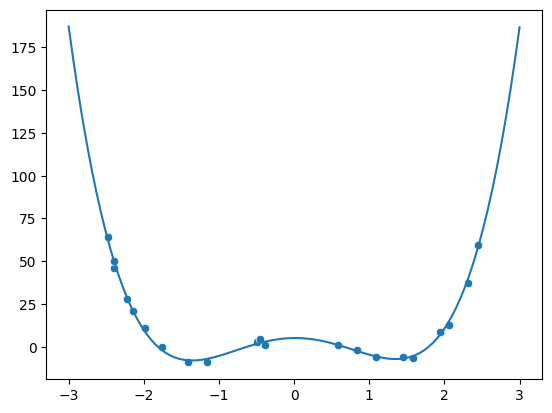

In [ ]:
x_plot = np.linspace(-3,3,100)
x_plot_pol = poly.fit_transform(x_plot.reshape(-1,1))
col =poly.get_feature_names_out().tolist()
x_plot_pol = pd.DataFrame(x_plot_pol, columns=col)
x_plot_pol = x_plot_pol.drop(['1'], axis=1)
y_plot=best_model.predict(x_plot_pol)

sns.lineplot(x = x_plot, y= y_plot)
sns.scatterplot(x = X, y= y)

De esta forma, el mejor modelo será un modelo de grado 4 sin regularización

In [ ]:
print(best_model.coef_)

[  0.41099011 -13.8598185   -0.05421202   3.78396874]


Y con un intercepto en

In [ ]:
print(best_model.intercept_)

5.163589453108864


### Bootstrap con el mejor modelo

En esta sección Implementaremos el procedimiento de bootstrap para estimar la distribución MSE
del mejor modelo de los pasos anteriores, es decir, el modelo de grado 4 sin regulariazción..

In [ ]:
X_pol, y

(          x0      x0^2       x0^3       x0^4
 0  -2.139791  4.578704  -9.797466  20.964526
 1   2.447201  5.988794  14.655783  35.865651
 2  -2.475317  6.127194 -15.166747  37.542507
 3  -0.495070  0.245094  -0.121339   0.060071
 4  -1.763343  3.109377  -5.482898   9.668228
 5   1.085975  1.179342   1.280736   1.390848
 6  -2.392927  5.726098 -13.702131  32.788194
 7  -1.409810  1.987564  -2.802088   3.950411
 8  -0.456663  0.208542  -0.095233   0.043490
 9   2.054615  4.221442   8.673438  17.820574
 10  1.451806  2.107741   3.060032   4.442573
 11  1.948140  3.795250   7.393679  14.403923
 12  0.833216  0.694249   0.578460   0.481982
 13 -1.990102  3.960505  -7.881808  15.685601
 14 -2.391266  5.718151 -13.673619  32.697256
 15 -0.383389  0.146987  -0.056353   0.021605
 16 -2.221183  4.933654 -10.958547  24.340938
 17 -1.160684  1.347187  -1.563658   1.814913
 18  0.578090  0.334189   0.193191   0.111682
 19  2.309977  5.335992  12.326018  28.472816
 20  1.946026  3.787016   7.369630

Para eso, aplicaremos el proceso de bootstrap 100 veces y usaremos la función resample, que nos permitirá obtener muestras del dataset con reemplazo

In [ ]:
n_iterations = 100
bootstrap_size = int(X_pol.shape[0] * 0.80)

In [ ]:
X_val_pol = poly.transform(X_val.reshape(-1,1))
col =poly.get_feature_names_out().tolist()
X_val_pol = pd.DataFrame(X_val_pol, columns=col)
X_val_pol = X_val_pol.drop(['1'], axis=1)

bootstrap_mse = []
bootstrap_pred = []
for i in range(n_iterations):
    X_sample, y_sample = resample(X_pol, y, n_samples=bootstrap_size)
    model = LinearRegression()
    model.fit(X_sample, y_sample)

    # Hacer predicciones sobre todo el conjunto de datos
    y_pred = model.predict(X_pol)
    bootstrap_mse.append(mean_squared_error(y, y_pred))
    bootstrap_pred.append(model.predict(X_val_pol))
bootstrap_mse
bootstrap_pred = np.array(bootstrap_pred)


array([[19.527414  , 58.82118637, 58.50601731, ..., 39.92065092,
         7.79374782, -5.26288604],
       [20.50294311, 54.99626864, 61.48614296, ..., 37.52879163,
         7.89353484, -4.17331556],
       [21.13012306, 56.74439289, 63.62499664, ..., 38.12679229,
         6.79470443, -5.54497536],
       ...,
       [21.20904395, 62.96639498, 64.15173834, ..., 42.78270474,
         8.51529462, -5.38144733],
       [19.83978571, 59.40483241, 63.5836202 , ..., 39.60956176,
         6.51169443, -6.17857344],
       [20.68977714, 55.53872165, 58.9769673 , ..., 37.15355476,
         6.07721866, -6.27172136]])

Vamos a ver los resultados del bootstrap, los cuales serán medidos por el MSE en cada iteración del bootstrap

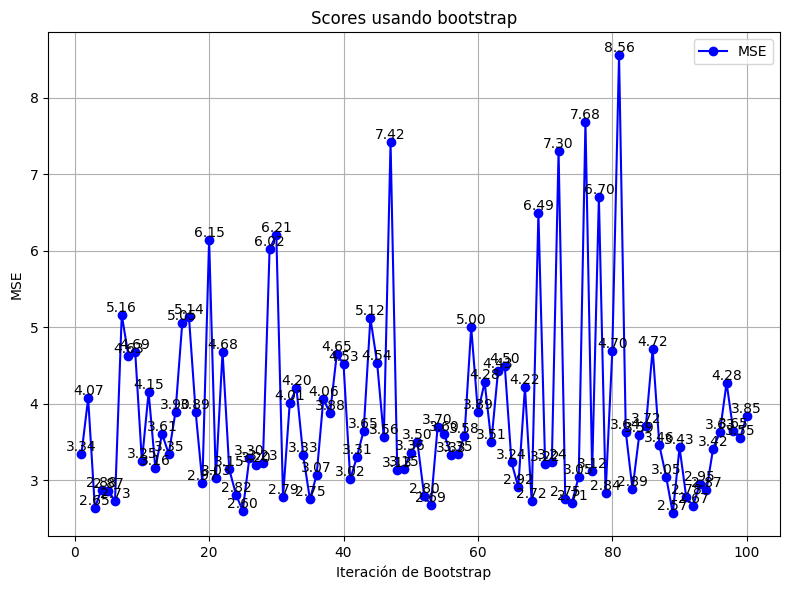

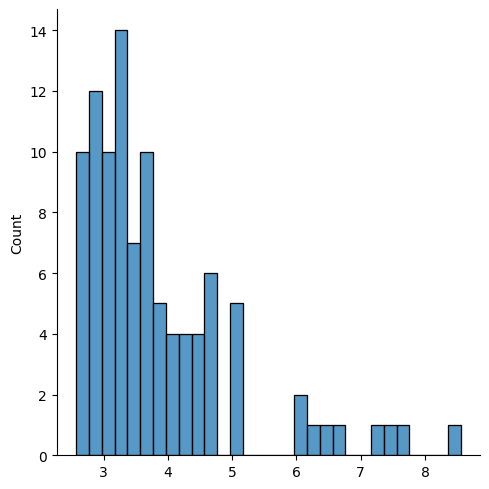

In [ ]:
# Crear una figura y un eje
plt.figure(figsize=(8, 6))
plt.title("Scores usando bootstrap")
plt.xlabel("Iteración de Bootstrap")
plt.ylabel("MSE")

plt.plot(range(1, len(bootstrap_mse) + 1), bootstrap_mse, marker='o', linestyle='-', color='blue', label='MSE')

for i, mse in enumerate(bootstrap_mse):
    plt.text(i + 1, mse, f"{mse:.2f}", ha='center', va='bottom')

# Mostrar leyenda y grilla
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

sns.displot(bootstrap_mse, bins = 30)

Podemos ver que la mayoría de los errores cuadráticos medios se encuentra por debajo de 7 unidades, con lo que, teniendo datos de máximo 70 unidades, resulta ser un error bajo.

<ErrorbarContainer object of 3 artists>

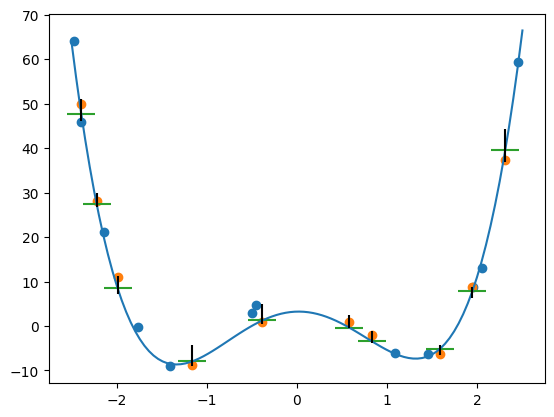

In [ ]:
plt.scatter(x = X_train, y= y_train)
plt.scatter(x = X_val, y= y_val)
x_plot = np.linspace(-2.5,2.5,100)
x_plot_pol = poly.fit_transform(x_plot.reshape(-1,1))
col =poly.get_feature_names_out().tolist()
x_plot_pol = pd.DataFrame(x_plot_pol, columns=col)
x_plot_pol = x_plot_pol.drop(['1'], axis=1)
y_plot=model.predict(x_plot_pol)
sns.lineplot(x = x_plot, y= y_plot)

lo_pred = np.percentile(bootstrap_pred, 2.5, axis =0)
up_pred = np.percentile(bootstrap_pred, 97.5, axis =0)
y_val_pred = model.predict(X_val_pol)
plt.scatter(X_val, y_val_pred, marker='_', s= 400)
plt.errorbar(X_val, y_val, yerr=[abs(y_val-lo_pred), abs(up_pred-y_val)], ls='none', ecolor='Black')
# abs(up_pred-y_val)

Al observar las barras de error del modelo en la estimación, posemos ver que estas son bastante bajas, con lo cual el ajuste se esta realizando correctamente

# Conclusión

De esta forma, logramos concluir que el modelo que mejor ajusta los datos que fueron entregados, es un modelo de regresión de grado 4 sobre x con los siguientes coeficientes para x^1, x^2, x^3 y x^4

In [ ]:
best_model.coef_

array([  0.41099011, -13.8598185 ,  -0.05421202,   3.78396874])

Y el siguiente intecepto

In [ ]:
best_model.intercept_

5.163589453108864

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4d95ea4b-1989-49a0-85a4-49dea6db2700' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>